Rotating half of the images...
Half of the images rotated.
Data shape:  (198, 4097)


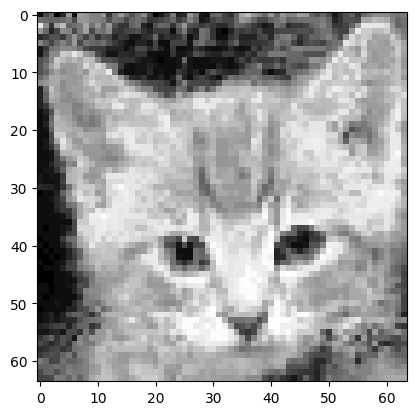

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

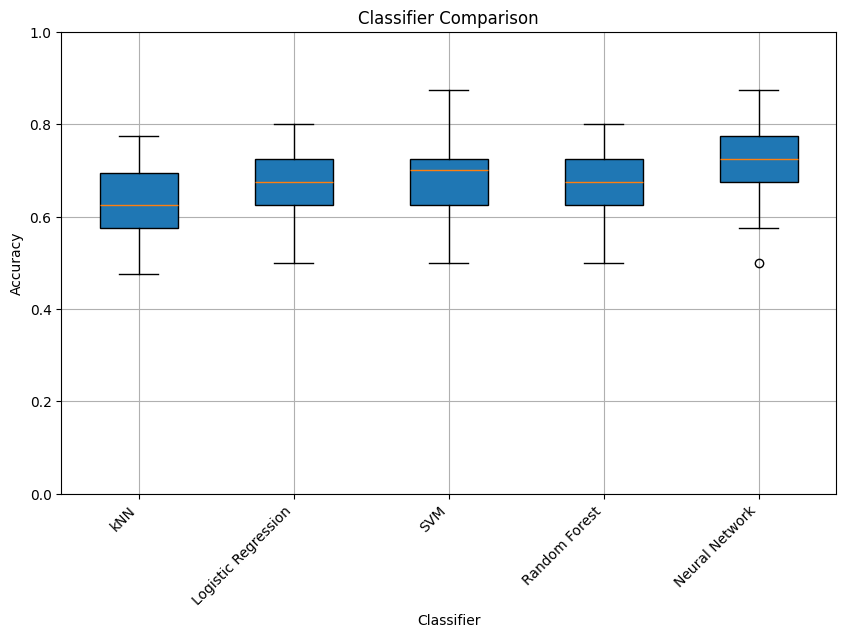

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd


classifiers = {
    'kNN': KNeighborsClassifier(n_neighbors=11),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier()
}

def standardize(train_data, test_data):
    sc = StandardScaler()
    train_data = sc.fit_transform(train_data)
    test_data = sc.transform(test_data)
    return train_data, test_data

def load_data_to_df():
    file_path_data = "CATSnDOGS.csv"
    file_path_labels = "Labels.csv"
    delimiter = ","
    df_data = pd.read_csv(file_path_data, delimiter=delimiter, header=0, quotechar='"')
    df_labels = pd.read_csv(
        file_path_labels, delimiter=delimiter, header=0, quotechar='"'
    )
    images = df_data.to_numpy()
    correct_images = [im.reshape(64, 64).T for im in images]
    correct_images = np.array(correct_images)
    flattened_correct_images = [im.flatten() for im in correct_images]
    df = pd.DataFrame(flattened_correct_images)
    df["Label"] = df_labels
    
    return df

def rotate_images(df):
    indices_to_rotate = np.random.choice(df.index, len(df) // 2, replace=False)
   # Work only with the image data (assuming 'Label' is the last column)
    image_data = df.drop('Label', axis=1)
    images = image_data.to_numpy()
       # Rotate selected images by 180 degrees
    for index in indices_to_rotate:
        images[index] = np.rot90(images[index].reshape(64, 64), 2).flatten()  # Rotate and flatten the image


    # Reconstruct the DataFrame
    rotated_df = pd.DataFrame(images, columns=df.columns[:-1])
    rotated_df['Label'] = df['Label']  # Reattach the label
    return rotated_df

# Load and rotate images
df = load_data_to_df()
print("Rotating half of the images...")
df = rotate_images(df)
print("Half of the images rotated.")
print("Data shape: ", df.shape)

# Display the first rotated image (for visualization)
plt.imshow(df.iloc[0, :-1].values.reshape(64, 64), cmap="gray")
plt.show()


# Assuming df is your DataFrame with rotated images
X = df.drop('Label', axis=1).values  # Feature set
y = df['Label'].values  # Labels

results = {}
for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train_scaled, X_test_scaled = standardize(X_train, X_test)   #Mind: no 


    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train.ravel())
        y_pred = clf.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        if name not in results.keys():
            results[name] = []
        results[name].append(accuracy)

        cross_val_acc = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
        #print(f"{name} test accuracy: {accuracy:.2f}, Cross-validated accuracy: {np.mean(cross_val_acc):.2f}")

# Create DataFrame for box plot
df = pd.DataFrame(results.items(), columns=['Classifier', 'Accuracy'])

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(df['Accuracy'], patch_artist=True)
plt.xticks([i+1 for i in range(len(df))], df['Classifier'], rotation=45, ha='right')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Comparison')
plt.ylim(0.0, 1.0)
plt.grid(True)
plt.show()


